# Pythonを使ったデータ処理・プロット実習
by konkon

## インポート

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## サンプルデータ読み込み

In [208]:
df = pd.read_csv('sample_dataset.csv',index_col=0)

## データの確認
10個の試料(sample1 ~ sample10)にそれぞれ100個のデータが存在する。

In [209]:
df.shape #.shape で読み込んだデータの次元を表示。

(100, 10)

In [210]:
df.head() # .head() で先頭の5行を表示する。

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
0,-1.441095,0.241044,1.371511,1.636436,3.535775,4.198332,5.570189,5.419388,6.992805,8.324937
1,-1.403457,0.251049,1.500388,1.924327,3.602167,4.327820,5.600206,5.806182,7.035443,8.380340
2,-1.203071,0.261503,1.528938,2.180476,3.618159,4.342810,5.649018,5.952031,7.120388,8.508795
3,-1.129144,0.272901,1.563957,2.195627,3.629429,4.404257,5.666500,6.026807,7.123272,8.570063
4,-1.075523,0.354611,1.568460,2.223983,3.657056,4.438216,5.690261,6.029408,7.140875,8.599728


## 折れ線グラフの表示(列)
各サンプルの第１列(sample1)のデータを折れ線グラフとしてプロット。
また、sample1 ~ sample3のプロットを同時に表示。

In [211]:
col1 = df['sample1'] #列は名前で指定できる。

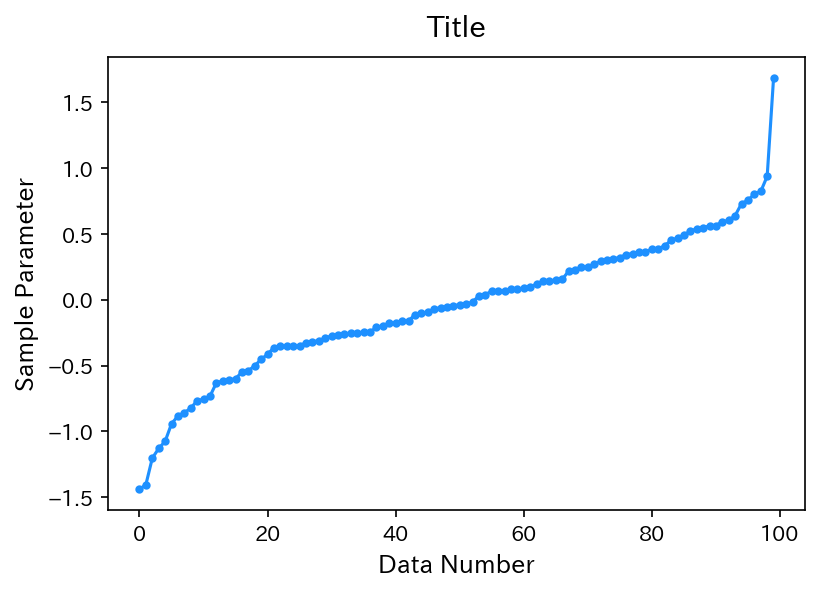

In [242]:
# 折れ線プロットの表示
# 点数が多いのでマーカーサイズは小さめに。
fig = plt.figure(figsize=(6,4),dpi=150)
plt.plot(col1,'o-',color='dodgerblue',ms=3)
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Data Number',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.show()

In [246]:
col1 = df['sample1'] 
col2 = df['sample2'] 
col3 = df['sample3'] 

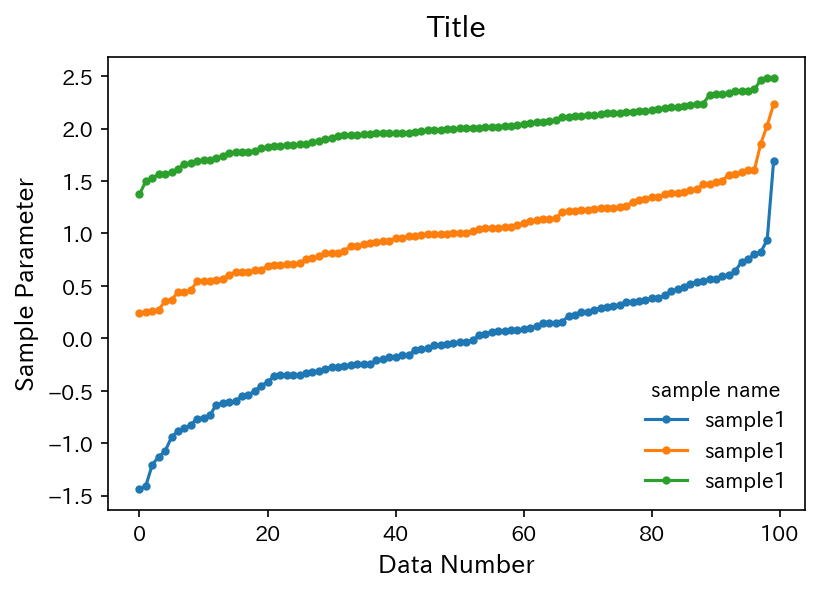

In [250]:
# 折れ線プロットの表示
# 点数が多いのでマーカーサイズは小さめに。
fig = plt.figure(figsize=(6,4),dpi=150)
plt.plot(col1,'o-',ms=3,label='sample1')
plt.plot(col2,'o-',ms=3,label='sample1')
plt.plot(col3,'o-',ms=3,label='sample1')
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Data Number',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.legend(frameon=False,loc='lower right',title='sample name')
plt.show()

## 折れ線グラフの表示(行)
各サンプルの第１行のデータを折れ線グラフとしてプロット。

In [251]:
# .iloc[行数, 列数]で対応するデータを抽出。
# コロン(：)はすべて抽出することを示す。詳しくは"numpy スライス"で検索。
row1 = df.iloc[0,:] 

In [252]:
row1 #データの確認

sample1    -1.441095
sample2     0.241044
sample3     1.371511
sample4     1.636436
sample5     3.535775
sample6     4.198332
sample7     5.570189
sample8     5.419388
sample9     6.992805
sample10    8.324937
Name: 0, dtype: float64

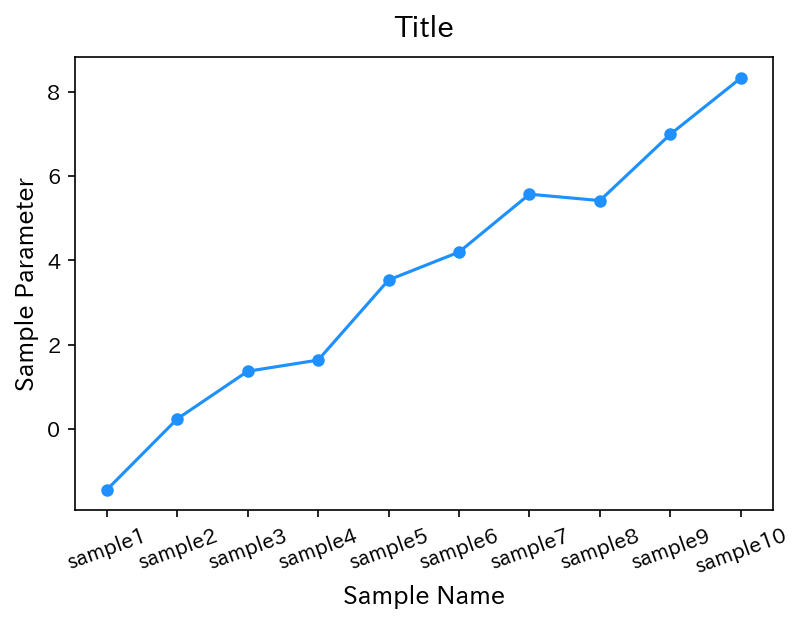

In [253]:
# 折れ線プロットの表示
# 横軸はサンプル名。長いので少し傾けている。
fig = plt.figure(figsize=(6,4),dpi=150)
plt.plot(row1,'o-',color='dodgerblue',ms=5)
plt.xticks(rotation=20)
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Sample Name',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.show()

## ヒストグラムの表示(列)
各サンプルの第１列(sample1)のデータのヒストグラムをプロット。  
また、複数のサンプル(sample1, sample2, sample3)を同時に表示。

In [254]:
col1 = df['sample1'] #列は名前で指定できる。

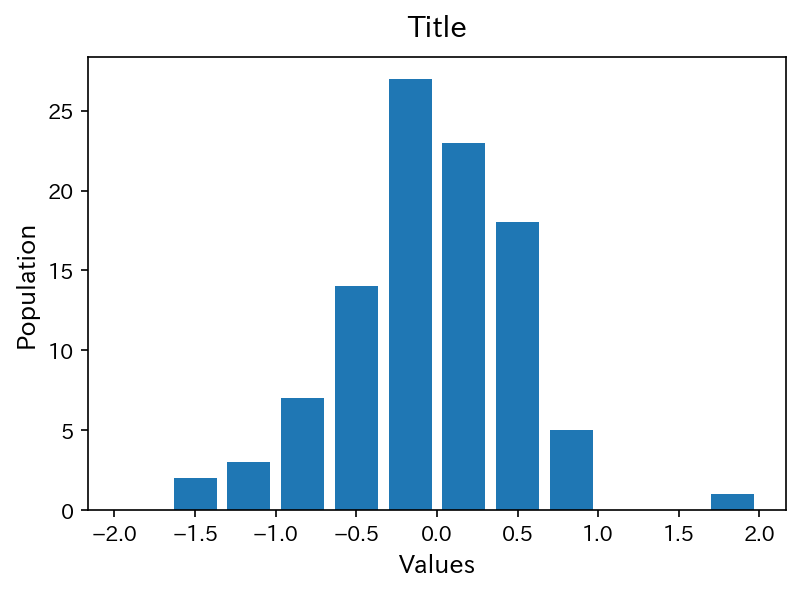

In [255]:
# ヒストグラムの表示
# 横軸はsample1の測定値。
fig = plt.figure(figsize=(6,4),dpi=150)
plt.hist(col1,bins=12,rwidth=0.8,range=(-2,2))
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Values',fontsize=12)
plt.ylabel('Population',fontsize=12)
plt.show()

In [256]:
col1 = df['sample1']
col2 = df['sample2']
col3 = df['sample3']

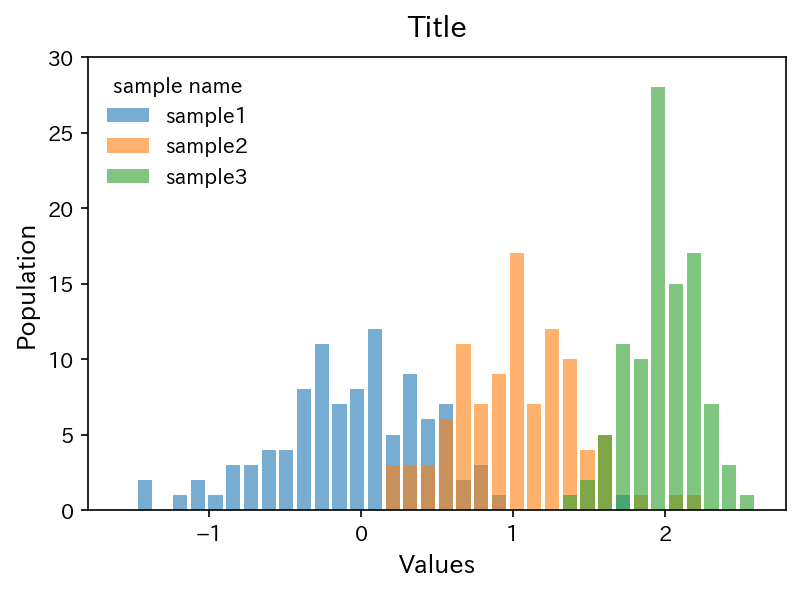

In [257]:
# ヒストグラムの表示
# 横軸はsample1の測定値。
fig = plt.figure(figsize=(6,4),dpi=150)
plt.hist(col1,bins=36,rwidth=0.8,range=(-1.6,2.6),alpha=0.6,label='sample1')
plt.hist(col2,bins=36,rwidth=0.8,range=(-1.6,2.6),alpha=0.6,label='sample2')
plt.hist(col3,bins=36,rwidth=0.8,range=(-1.6,2.6),alpha=0.6,label='sample3')
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Values',fontsize=12)
plt.ylabel('Population',fontsize=12)
plt.ylim(0,30)
plt.legend(frameon=False,loc='upper left',title='sample name')
plt.show()

## エラーバー付き折れ線プロットの表示
各サンプルの平均値をプロットの値、標準偏差をエラーバーの幅とする。

In [258]:
mean = list(np.mean(df)) #平均値を計算
std = list(np.std(df)) #標準偏差を計算

In [259]:
columns_name = list(df.columns)

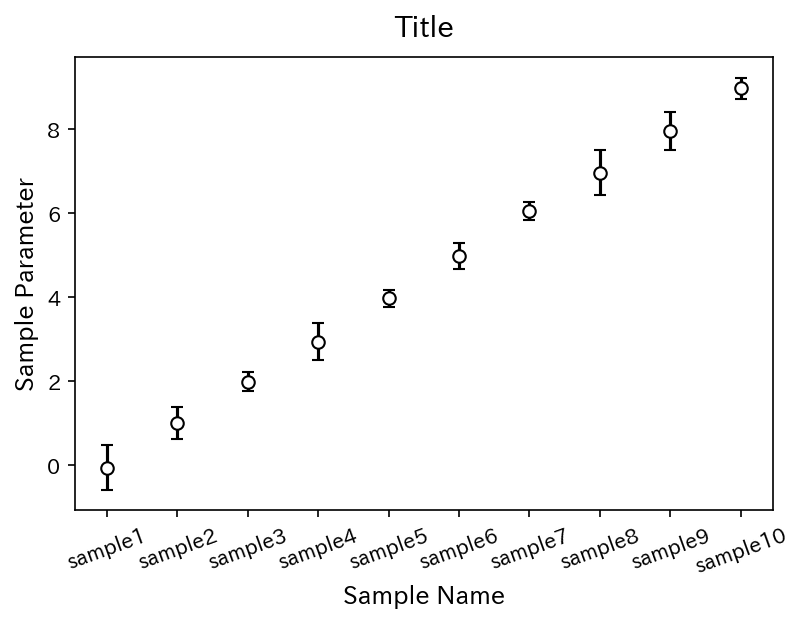

In [260]:
plt.figure(figsize=(6,4),dpi=150)
plt.errorbar(columns_name, mean, yerr = std, capsize=3, fmt='o', 
             markersize=6, ecolor='black', markeredgecolor = "black", color='w')
plt.xticks(rotation=20)
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Sample Name',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.show()

## 箱ひげ図の表示

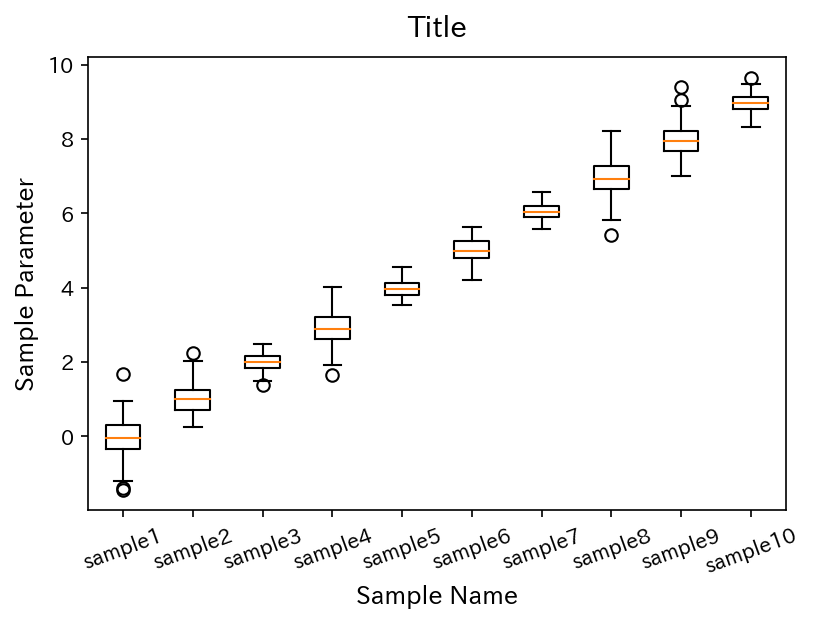

In [261]:
plt.figure(figsize=(6,4),dpi=150)
plt.boxplot(np.array(df),labels=columns_name)
plt.xticks(rotation=20)
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Sample Name',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.show()

## バイオリンプロットの表示

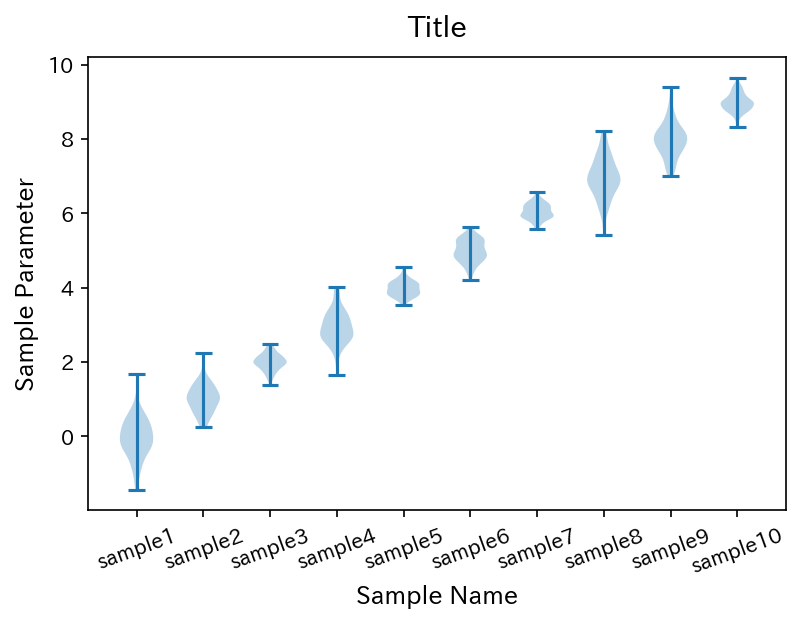

In [262]:
plt.figure(figsize=(6,4),dpi=150)
plt.violinplot(np.array(df))
plt.gca().set_xticks(np.linspace(1,10,10))
plt.gca().set_xticklabels(columns_name)
plt.xticks(rotation=20)
plt.title('Title',fontsize=14,pad=10)
plt.xlabel('Sample Name',fontsize=12)
plt.ylabel('Sample Parameter',fontsize=12)
plt.show()